In [5]:

from transformers import BertTokenizer, BertModel
from ct_clip import CTCLIP, TextTransformer


from ctvit import CTViT

image_encoder = CTViT(
    dim = 512,
    codebook_size = 8192,
    image_size = 480,
    patch_size = 20,
    temporal_patch_size = 10,
    spatial_depth = 4,
    temporal_depth = 4,
    dim_head = 32,
    heads = 8
)

pretrain = 'vinai/phobert-base'
tokenizer = BertTokenizer.from_pretrained(pretrain, do_lower_case=True)
text_encoder = BertModel.from_pretrained(pretrain)

clip = CTCLIP(
    image_encoder = image_encoder,
    text_encoder = text_encoder,
    dim_text = 768,
    dim_image = 294912,
    dim_latent = 512,
    extra_latent_projection = False,         # whether to use separate projections for text-to-image vs image-to-text comparisons (CLOOB)
    use_mlm=False,
    downsample_image_embeds = False,
    use_all_token_embeds = False
)

import torch
clip.load_state_dict(torch.load("/home/user01/aiotlab/htien/pet-clip/scripts/ct_clip/CTClip.39000.pt", map_location='cpu'))




/home/user01/miniconda3/envs/thaind/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/user01/miniconda3/envs/thaind/lib/python3.12/site-packages/vector_quantize_pytorch/vector_quantize_pytorch.py:261: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled = False)
/home/user01/miniconda3/envs/thaind/lib/python3.12/site-packages/vector_quantize_pytorch/vector_quantize_pytorch.py:391: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled = False)
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you loa

<All keys matched successfully>

In [6]:
cvit = clip.visual_transformer

# save ckpt of cvit
torch.save(cvit.state_dict(), '/home/user01/aiotlab/htien/pet-clip/ViT_ckpts/CTVit.39000.pt')

In [7]:
# load ckpt of cvit
cvit.load_state_dict(torch.load('/home/user01/aiotlab/htien/pet-clip/ViT_ckpts/CTVit.39000.pt'))


/tmp/ipykernel_3836000/4037258779.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cvit.load_state_dict(torch.load('/home/user01/aiotlab/htien/pet-clip/ViT_ckpts/CTVit.39

<All keys matched successfully>

In [1]:

from ctvit import CTViT

image_encoder = CTViT(
    dim = 512,
    codebook_size = 8192,
    image_size = 480,
    patch_size = 20,
    temporal_patch_size = 10,
    spatial_depth = 4,
    temporal_depth = 4,
    dim_head = 32,
    heads = 8
)

# output = image_encoder(input, return_encoded_tokens=True)

# print(output.shape) # torch.Size([1, 512])

/mnt/disk1/anaconda3/envs/fedfm/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


ModuleNotFoundError: No module named 'vector_quantize_pytorch'

In [5]:
import torch
image_encoder.load_state_dict(torch.load('/mnt/disk1/ducntm/ducntm/FmMed/ckpt/CTVit.39000.pt'), strict = False)


_IncompatibleKeys(missing_keys=['vq._codebook.embed_avg'], unexpected_keys=[])

In [4]:
image_encoder.vq._codebook.embed_avg

AttributeError: 'CosineSimCodebook' object has no attribute 'embed_avg'

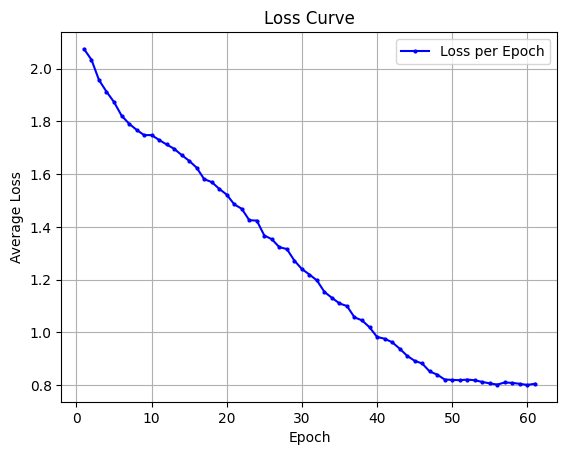

In [3]:
import matplotlib.pyplot as plt

def process_loss_log(file_path, steps_per_epoch=650):
    # Đọc dữ liệu từ file loss_log.txt
    loss_values = []
    with open(file_path, 'r') as file:
        for line in file:
            if "loss:" in line:
                loss = float(line.split(":")[2].strip())
                loss_values.append(loss)

    # Tính loss trung bình mỗi epoch (650 step cho mỗi epoch)
    epochs = len(loss_values) // steps_per_epoch
    avg_loss_per_epoch = []

    for epoch in range(epochs):
        start_idx = epoch * steps_per_epoch
        end_idx = start_idx + steps_per_epoch
        avg_loss = sum(loss_values[start_idx:end_idx]) / steps_per_epoch
        avg_loss_per_epoch.append(avg_loss)

    return avg_loss_per_epoch

def plot_loss_curve(avg_loss_per_epoch):
    # Vẽ loss curve
    plt.plot(
        range(1, len(avg_loss_per_epoch) + 1),
        avg_loss_per_epoch,
        marker='o',
        markersize=2,  # 👈 giảm kích thước marker tại đây (mặc định thường là 6)
        color='b',
        label='Loss per Epoch'
    )
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss')
    plt.title('Loss Curve')
    plt.grid(True)
    plt.legend()
    plt.show()

# Đọc file và tính toán loss trung bình mỗi epoch
file_path = '/home/user01/aiotlab/htien/pet-clip/scripts/ct_clip_DAC001/0_logs.txt'  # Đường dẫn đến file loss_log.txt của bạn
avg_loss_per_epoch = process_loss_log(file_path)

# Vẽ loss curve
plot_loss_curve(avg_loss_per_epoch)